In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def distance(x1, x2):
    d = np.sqrt(((x1-x2)**2).sum())
    return d

def knn(X_train, y_train, xt, k=7):
    vals = []
    for ix in range(X_train.shape[0]):
        d = distance(X_train[ix], xt)
        vals.append([d, y_train[ix]])
    sorted_labels = sorted(vals, key=lambda z: z[0])
    neighbours = np.asarray(sorted_labels)[:k, -1]
    
    freq = np.unique(neighbours, return_counts=True)
    
    return freq[0][freq[1].argmax()]

In [3]:
import pandas as pd
import datetime

In [4]:
df = pd.read_csv('train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data = df.values[:2000]
print(data.shape)

(2000, 785)


In [6]:
split = int(0.8 * data.shape[0])

X_train = data[:split, 1:]
X_test = data[split:, 1:]

y_train = data[:split, 0]
y_test = data[split:, 0]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1600, 784) (1600,)
(400, 784) (400,)


3


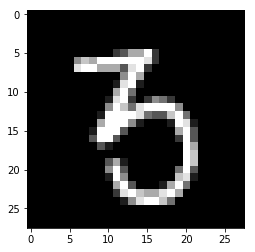

In [7]:
plt.figure(0)
plt.imshow(X_train[90].reshape((28, 28)), cmap='gray', interpolation='none')
print(y_train[90])
plt.show()

In [8]:
def get_acc(kx):
    preds = []
    # print kx
    for ix in range(X_test.shape[0]):
        start = datetime.datetime.now()
        preds.append(knn(X_train, y_train, X_test[ix], k=kx))
        # print datetime.datetime.now() - start
    preds = np.asarray(preds)
    
    # print preds.shape
    return 100*float((y_test == preds).sum())/preds.shape[0]

In [9]:
for ix in range(2, 20):
    print("k:", ix, "| Acc:", get_acc(ix))

k: 2 | Acc: 89.0
k: 3 | Acc: 90.0
k: 4 | Acc: 90.25
k: 5 | Acc: 89.25
k: 6 | Acc: 89.75
k: 7 | Acc: 89.75
k: 8 | Acc: 90.0
k: 9 | Acc: 89.0
k: 10 | Acc: 89.5
k: 11 | Acc: 87.75
k: 12 | Acc: 87.5
k: 13 | Acc: 88.0
k: 14 | Acc: 87.0
k: 15 | Acc: 86.75
k: 16 | Acc: 86.5
k: 17 | Acc: 86.75
k: 18 | Acc: 86.75
k: 19 | Acc: 87.0
